In [2]:
import numpy as np
import cv2
import sys

In [16]:
img = cv2.imread('./fig/lenna.bmp',1)

h, w = img.shape[:2]

img_linear = cv2.resize(img,(int(4*w),int(h*4)),interpolation = cv2.INTER_LINEAR) # AREA 줄이는데 사용 special   
img_nearest = cv2.resize(img,(int(4*w),int(h*4)),interpolation = cv2.INTER_NEAREST) # AREA 줄이는데 사용 special   
                      

if img is None:
    print(None)
    sys.exit()
cv2.namedWindow('image',cv2.WINDOW_AUTOSIZE)
cv2.moveWindow('image',0,0)

cv2.imshow('image',img)
cv2.imshow('image_linear',img_linear)
cv2.imshow('image_nearest',img_nearest)
                         


while True:
    key = cv2.waitKey()
    if key == 27:
        break
    elif key == ord('i'):
        img = 255- img
    elif key == ord('e'):
        cv2.Canny(img,50,150)
cv2.destroyAllWindows()

In [18]:
imgBGR = cv2.imread('./fig/lenna.bmp',1)

imgHSV = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(imgHSV) #V값 255로 고정한뒤 cv2.merge

cv2.imshow('imgBGR',imgBGR)
cv2.imshow('imgHSV',imgHSV)

cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
import glob

img_list = glob.glob('../Ch_1_Opencv_Intro/fig/new_image/*.png')
idx = 0
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.setWindowProperty('image',cv2.WND_PROP_FULLSCREEN,cv2.WINDOW_FULLSCREEN)
while True:
    img = cv2.imread(img_list[idx],cv2.IMREAD_COLOR)
    cv2.imshow('image',img)
    
    idx += 1 - int(idx / len(img_list))* (img_list+1)
    if cv2.waitKey() == ord('q'):
        break
        
cv2.destroyAllWindows()

TypeError: can only concatenate list (not "int") to list

In [ ]:
img1 = np.zeros((400,600,3),np.uint8)
img2 = np.ones((400,600,3),np.uint8) * 255
img3 = np.full((400,600,3),(255,0,255),np.uint8)

In [5]:
src = cv2.imread('../Ch_2_Opencv_basic/fig/airplane.bmp')
mask = cv2.imread('../Ch_2_Opencv_basic/fig/mask_plane.bmp',0)
dst = cv2.imread('../Ch_2_Opencv_basic/fig/field.bmp')

print(src.shape,mask.shape,dst.shape)

cv2.copyTo(src,mask,dst)

cv2.imshow('src',src)
cv2.imshow('mask',mask)
cv2.imshow('dst',dst)

cv2.waitKey()
cv2.destroyAllWindows()

(400, 600, 3) (400, 600) (400, 600, 3)


In [4]:
cap = cv2.VideoCapture(0)

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('review.avi',fourcc,fps,(w,h))

if not cap.isOpened():
    sys.exit('WebCam open failed')

while True:
    ret, frame = cap.read()
    
    if not ret:
        sys.exit('WebCam open Failed')
        break
    
    out.write(frame)
    cv2.imshow('imshow',frame)
    if cv2.waitKey(20) == 27:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

In [11]:
## Mouse Event
oldx = oldy = 0
def call_mouse(event,x,y,flags,para):
    global oldx, oldy
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        print(x,y)
    elif event == cv2.EVENT_MOUSEMOVE:
            if flags == cv2.EVENT_FLAG_LBUTTON:
                cv2.line(img,(oldx,oldy),(x,y),(0,0,255),5,cv2.LINE_AA)
                cv2.imshow('image',img)
                oldx, oldy = x,y
            
            
            
img = np.ones((480,640,3),dtype = np.uint8) * 255

cv2.namedWindow('image')
cv2.setMouseCallback('image',call_mouse,img)

cv2.imshow('image',img)

cv2.waitKey()
cv2.destroyAllWindows()

513 200
538 193


In [3]:
def call_trackbar(pos):
    img[:] = pos
    cv2.imshow('image',img)

img = np.zeros((480,640),np.uint8)
cv2.namedWindow('image')
cv2.createTrackbar('level','image',50,255,call_trackbar)
cv2.imshow('image',img)
cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
import numpy as np
import cv2
import sys

In [12]:
import matplotlib.pyplot as plt

In [22]:
src = cv2.imread('./fig/lenna.bmp',0)

dst = cv2.add(src , 100)
dst_np = np.clip(src + 100.0,0,255).astype(np.uint8)


cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.imshow('dst_np',dst_np)


cv2.waitKey()
cv2.destroyAllWindows()

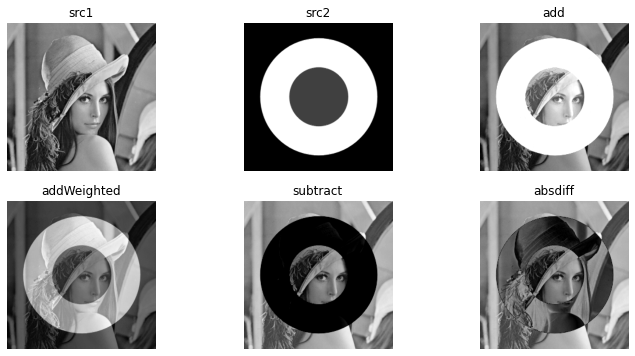

In [23]:
import matplotlib.pyplot as plt

src1 = cv2.imread('./fig/lenna256.bmp',cv2.IMREAD_GRAYSCALE)
h, w = src1.shape[:2]
src2 = np.zeros_like(src1,dtype = np.uint8)
cv2.circle(src2,(128,128),100,200,-1,cv2.LINE_AA)
cv2.circle(src2,(128,128),50,50,-1,cv2.LINE_AA)

dst1 = cv2.add(src1,src2)
dst2 = cv2.addWeighted(src1,0.5, src2, 0.5,0.0)
dst3 = cv2.subtract(src1,src2)
dst4 = cv2.absdiff(src1,src2) # 차이값에 절대값을 씌운다

plt.figure(figsize = (12, 6))
plt.subplot(231), plt.axis('off'), plt.imshow(src1, 'gray'), plt.title('src1')
plt.subplot(232), plt.axis('off'), plt.imshow(src2, 'gray'), plt.title('src2')
plt.subplot(233), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('add')
plt.subplot(234), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('addWeighted')
plt.subplot(235), plt.axis('off'), plt.imshow(dst3, 'gray'), plt.title('subtract')
plt.subplot(236), plt.axis('off'), plt.imshow(dst4, 'gray'), plt.title('absdiff')
plt.show()
